In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
try:

    df = pd.read_csv("WorldPopulation.csv")
    data_dict = df.to_dict(orient='records')

    split_data = [
        [row['Year'], row['Population'], row['ChangePerc'], row['NetChange'], 
         row['Density'], row['Urban'], row['UrbanPerc']]
        for row in data_dict
    ]

    columns = ['Year', 'Population', 'ChangePerc', 'NetChange', 'Density', 'Urban', 'UrbanPerc']
    df = pd.DataFrame(split_data, columns=columns)

    # Contoh: konversi beberapa kolom jadi numerik (jika perlu)
    numeric_cols = ['Population', 'ChangePerc', 'NetChange', 'Density', 'UrbanPerc']
    df[numeric_cols] = df[numeric_cols].replace(',', '', regex=True).astype(float)

    print(df)

except FileNotFoundError:
    print("file not found")


    Year    Population  ChangePerc   NetChange  Density       Urban  UrbanPerc
0   2020  7.794799e+09        1.05  81330639.0     52.0  4378993944       56.0
1   2019  7.713468e+09        1.08  82377060.0     52.0  4299438618       56.0
2   2018  7.631091e+09        1.10  83232115.0     51.0  4219817318       55.0
3   2017  7.547859e+09        1.12  83836876.0     51.0  4140188594       55.0
4   2016  7.464022e+09        1.14  84224910.0     50.0  4060652683       54.0
..   ...           ...         ...         ...      ...         ...        ...
65  1955  2.773020e+09        1.77  48173195.0     19.0   877008842       32.0
66  1954  2.724847e+09        1.76  47237781.0     18.0   850179106       31.0
67  1953  2.677609e+09        1.78  46747398.0     18.0   824289989       31.0
68  1952  2.630862e+09        1.81  46827301.0     18.0   799282533       30.0
69  1951  2.584034e+09        1.88  47603112.0     17.0   775067697       30.0

[70 rows x 7 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

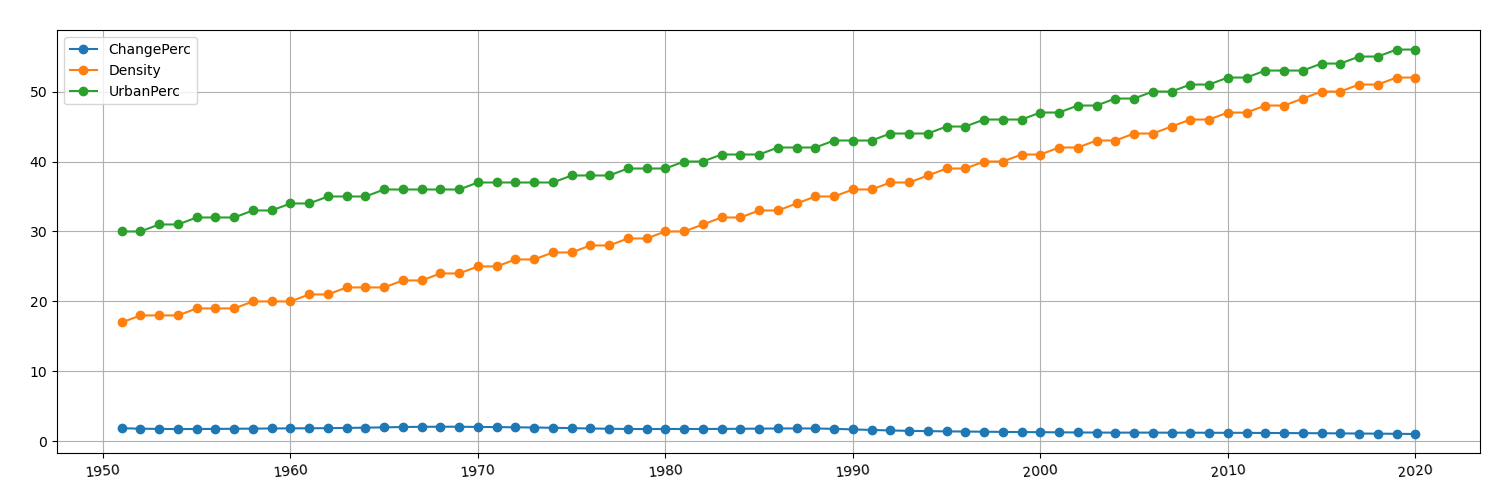

In [5]:
plt.figure(figsize=(15,5))

for data in['ChangePerc','Density','UrbanPerc']:
    plt.plot(df['Year'],df[data],marker='o', label=data)

plt.title(" ")
plt.ylabel(" ")
plt.legend()
plt.grid(True)
plt.xticks(rotation=5)
plt.tight_layout()
plt.show

33.55714285714286


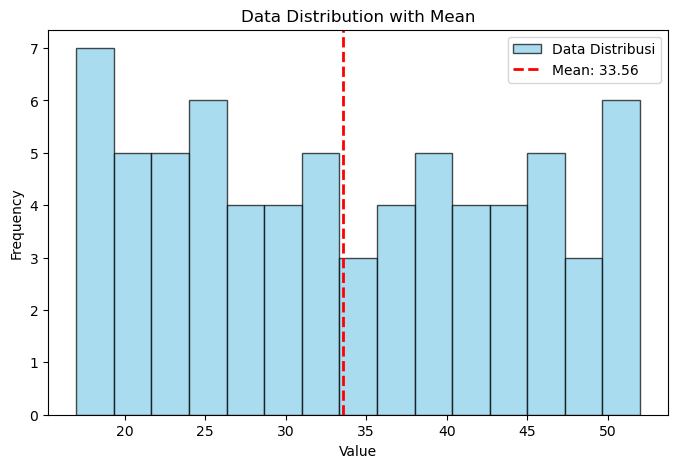

In [6]:
mean_value = np.mean(df["Density"])
print(mean_value)
plt.figure(figsize=(8,5))
plt.hist(df["Density"], bins=15, color='skyblue', edgecolor='black', alpha=0.7, label='Data Distribusi')

plt.axvline(mean_value,color='red',linestyle='--',linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Data Distribution with Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

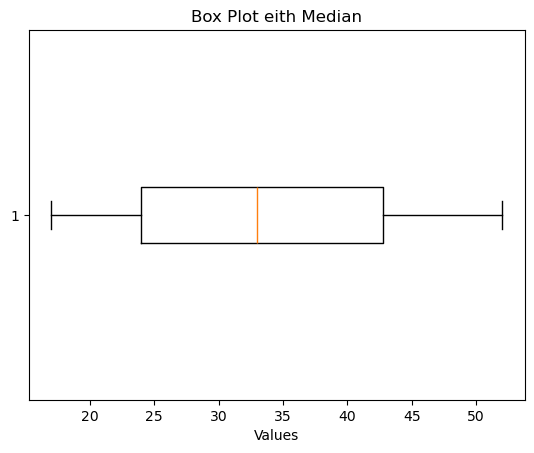

In [7]:
plt.boxplot(df["Density"], vert=False)
plt.title("Box Plot eith Median")
plt.xlabel("Values")
plt.show()

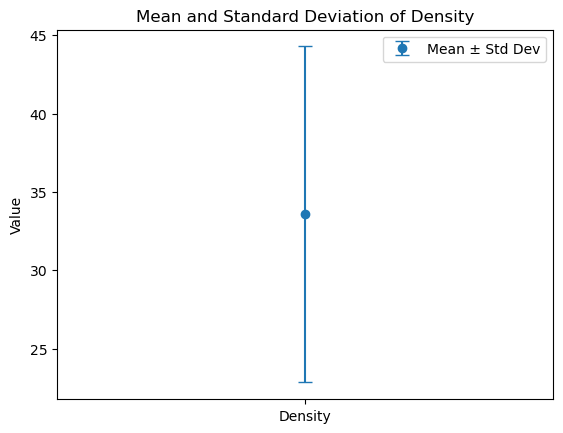

In [8]:
mean_density = df['Density'].mean()
std_density = df['Density'].std()
plt.errorbar(['Density'],[mean_density], yerr=[std_density], fmt='o', capsize=5, label='Mean ± Std Dev')

plt.title('Mean and Standard Deviation of Density')
plt.ylabel('Value')
plt.legend()

plt.show()

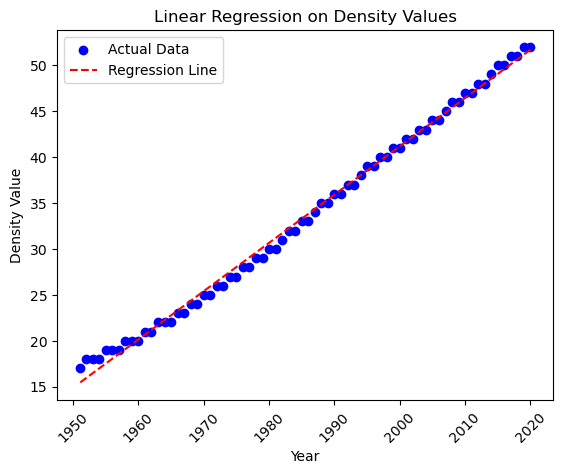

In [9]:
x = np.arange(len(df)).reshape(-1,1)
y = df['Density'].values
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)
plt.scatter(df['Year'], y, label='Actual Data', color='blue', marker='o')

plt.plot(df['Year'],y_pred, label='Regression Line', color='red',linestyle='--')

plt.title('Linear Regression on Density Values')
plt.xlabel('Year')
plt.ylabel('Density Value')
plt.legend()

plt.xticks(rotation=45)

plt.show()